# Установим библиотеку Yahoo Finance

In [2]:
!pip install yfinance

# Первое задание

In [8]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

# Получаем данные о нефти Brent
brent = yf.Ticker("BZ=F")
# выбираем период 5 лет
data = brent.history(period="5y")
# выбираем только цену на момент закрытия
prices = data['Close']

# Применяем тест Дикки-Фуллера
result = adfuller(prices)

# Выводим результаты
print('Статистика теста ADF:', result[0])
print('p-value:', result[1])
print('Число лагов:', result[2])
print('Число наблюдений:', result[3])
print('Критические значения:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Статистика теста ADF: -1.4889164024143104
p-value: 0.5389869375871562
Число лагов: 6
Число наблюдений: 1253
Критические значения:
   1%: -3.4355796466416777
   5%: -2.863849421064024
   10%: -2.5679995625056926


## Так как p-value > 0.05, это означает, что данный ряд не является стационарным

# Второе задание

In [11]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Получаем данные за последний год
dollar = yf.Ticker("RUB=X")
brent = yf.Ticker("BZ=F")

# Загружаем исторические данные
dollar_data = dollar.history(period="5y")
brent_data = brent.history(period="5y")

# Оставляем только столбец с ценами закрытия
dollar_prices = dollar_data['Close']
brent_prices = brent_data['Close']

# Преобразуем индексы у наших массивов, чтобы у наших данных день начинался с 00:00:00
dollar_prices.index = pd.DatetimeIndex(dollar_prices.index.values)
brent_prices.index = pd.DatetimeIndex(list(map(lambda x: x - np.timedelta64(5, 'h'), brent_prices.index.values)))

# Объединяем данные в один DataFrame
data = pd.DataFrame({'Dollar': dollar_prices, 'Brent': brent_prices})
data = data.dropna()  # Убираем строки с пропусками

# Добавляем константу к нашей модели (для свободного члена)
X = sm.add_constant(data['Brent'])
Y = data['Dollar']

# Создаем и обучаем модель
model = sm.OLS(Y, X).fit()

# Выводим результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Dollar   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     14.13
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           0.000179
Time:                        15:13:34   Log-Likelihood:                -4567.8
No. Observations:                1176   AIC:                             9140.
Df Residuals:                    1174   BIC:                             9150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.7441      1.344     54.145      0.0

# Третье задание

In [71]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Получаем ряды
dollar = yf.Ticker("RUB=X")
brent = yf.Ticker("BZ=F")

# Загружаем исторические данные за 5 лет
dollar_data = dollar.history(period="5y")
brent_data = brent.history(period="5y")

# Оставляем только столбец с ценами закрытия
dollar_prices = dollar_data['Close']
brent_prices = brent_data['Close']

# Преобразуем индексу у наших массивов, чтобы у наших данных день начинался с 00:00:00
dollar_prices.index = pd.DatetimeIndex(dollar_prices.index.values)
brent_prices.index = pd.DatetimeIndex(list(map(lambda x: x - np.timedelta64(5, 'h'), brent_prices.index.values)))

# Объединяем данные в один DataFrame
data = pd.DataFrame({'Dollar': dollar_prices, 'Brent': brent_prices})
data = data.dropna()  # Убираем строки с пропусками

# Преобразуем в логарифмы
data['Log_Dollar'] = np.log(data['Dollar'])
data['Log_Brent'] = np.log(data['Brent'])

# Добавляем константу к модели (для свободного члена)
X = sm.add_constant(data['Log_Brent'])  # Используем логарифм цены на нефть
Y = data['Log_Dollar']  # Логарифм курса доллара

# Создаем и обучаем модель
model = sm.OLS(Y, X).fit()

# Выводим результаты
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Log_Dollar   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.23
Date:                Thu, 21 Nov 2024   Prob (F-statistic):            0.00142
Time:                        11:54:13   Log-Likelihood:                 564.36
No. Observations:                1176   AIC:                            -1125.
Df Residuals:                    1174   BIC:                            -1115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1490      0.060     69.092      0.0

## Четвёртое задание

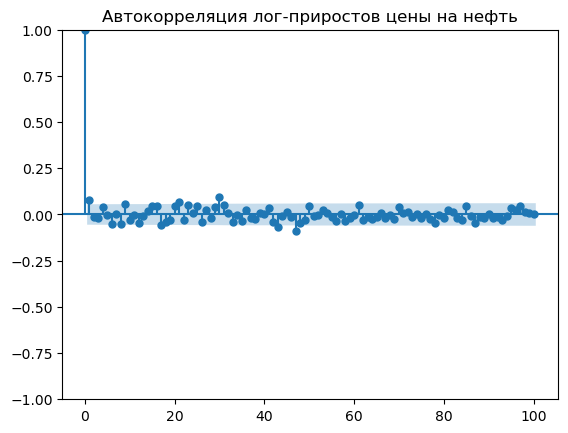

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Получаем данные за 5 лет
brent = yf.Ticker("BZ=F")
brent_data = brent.history(period="5y") 
prices = brent_data['Close']

# Вычисляем логарифмы цен
log_prices = np.log(prices)
# Вычисляем лог-приросты
log_diffs = log_prices.diff().dropna()

# Строим ACF
sm.graphics.tsa.plot_acf(log_diffs, lags=100)
plt.title('Автокорреляция лог-приростов цены на нефть')
plt.show()